In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/chaitanya/OneDrive/new_telecom_data.csv')
df.shape

(499, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.6,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No
498,6235-VDHOM,Female,1,No,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,28.45,131.05,Yes


In [6]:
df.size

10479

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0    7590-VHVEG  Female              0     Yes         No       1   
1    5575-GNVDE    Male              0      No         No      34   
2    3668-QPYBK    Male              0      No         No       2   
3    7795-CFOCW    Male              0      No         No      45   
4    9237-HQITU  Female              0      No         No       2   
..          ...     ...            ...     ...        ...     ...   
494  6579-JPICP    Male              0      No         No       1   
495  8205-OTCHB    Male              0      No         No      22   
496  4134-BSXLX    Male              0     Yes         No      28   
497  0505-SPOOW  Female              0     Yes         No      70   
498  6235-VDHOM  Female              1      No         No       5   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0             No  No phone service             DSL         

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['TotalCharges'].dtype

dtype('O')

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [14]:
df['TotalCharges'].dtype

dtype('float64')

In [15]:
categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner', 
    'Dependents',
    'PhoneService',
    'MultipleLines', 
    'InternetService',
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
]
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'churn'

In [16]:
df.skew(numeric_only = True)

SeniorCitizen     1.778168
tenure            0.304115
MonthlyCharges   -0.258571
TotalCharges      1.021574
dtype: float64

In [17]:
df.corr(numeric_only = True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,-0.037845,0.146242,0.023589
tenure,-0.037845,1.000000,0.200250,0.818219
MonthlyCharges,0.146242,0.200250,1.000000,0.622093
TotalCharges,0.023589,0.818219,0.622093,1.000000


In [18]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,499.000000,499.000000,498.000000
mean,31.492986,65.906313,2225.391968
std,24.424407,29.545447,2200.523473
min,0.000000,18.950000,19.150000
25%,8.000000,44.150000,420.500000
50%,28.000000,71.150000,1368.675000
75%,52.500000,89.900000,3578.212500
max,72.000000,116.050000,8468.200000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

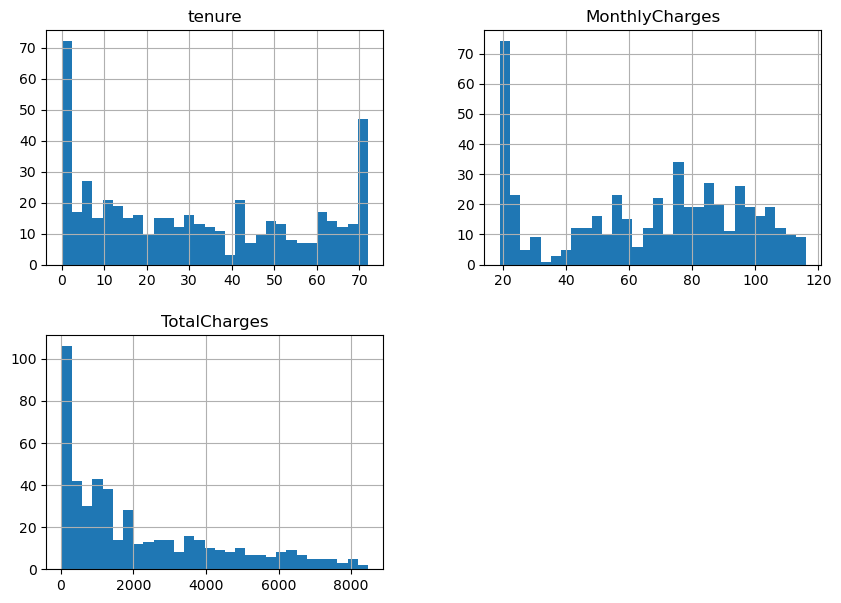

In [19]:
df[numerical_features].hist(bins=30,figsize=(10,7))

In [24]:
# outliers removing
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
    q1 = data[col].quantile(0.25,interpolation='nearest')
    q2 = data[col].quantile(0.5,interpolation = 'nearest')
    q3 = data[col].quantile(0.75,interpolation = 'nearest')
    q4 = data[col].quantile(1,interpolation = 'nearest')
    IQR = q3-q1
    global LLP
    global ULP
    LLP = q1 - 1.5*IQR
    ULP = q3 + 1.5*IQR
    if data[col].min() > LLP and data[col].max()< ULP:
        print('No outliers in ', i)
    else:
        print('there are no outliers', i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print('count of outliers are :',x+y)

global a
a=[]
for i in x:
    count_outliers(df,i)
        


No outliers in  tenure
No outliers in  MonthlyCharges


In [26]:
df.drop(['customerID'],axis = 1, inplace = True)

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df1 = pd.get_dummies(data= df,columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                                         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                         'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],drop_first=True)

In [30]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [31]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [33]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes']]

In [34]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [37]:
df1.shape

(499, 31)

In [38]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(missing_values= np.nan,strategy='mean')
df1.TotalCharges = imputer.fit_transform(df1['TotalCharges'].values.reshape(-1,1))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [43]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

In [44]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
x_train,x_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state =44)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

logmodel  = LogisticRegression()
logmodel.fit(x_train,Y_train)

LogisticRegression()

In [46]:
predLR  = logmodel.predict(x_test)

In [49]:
predLR

array([False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True,

In [50]:
print(classification_report(Y_test,predLR))

              precision    recall  f1-score   support

       False       0.88      0.88      0.88       113
        True       0.65      0.65      0.65        37

    accuracy                           0.83       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.83      0.83      0.83       150



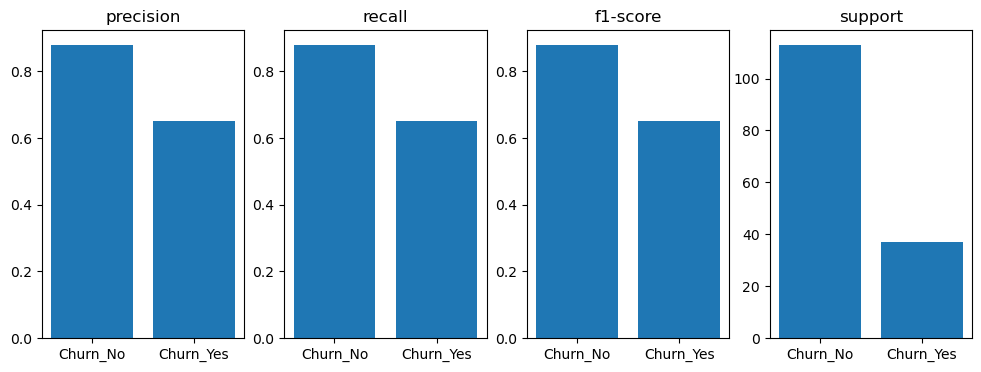

In [54]:
#calculating th classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No','Churn_Yes'])

#split the report into lines
lines = report.split('\n')

#split the each line into parts
parts = [line.split() for line in lines[2:-5]]

#extract the each metric for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision':float(part[1]), 'recall':float(part[2]), 'f1-score':float(part[3]),'support':float(part[4])}

# creating a bar chart for each metric
fig,ax = plt.subplots(1,4 , figsize = (12,4))
metrics = ['precision','recall','f1-score','support']
for i ,metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

#display the plot
plt.show()


In [55]:
confusion_matrix_LR = confusion_matrix(Y_test,predLR)

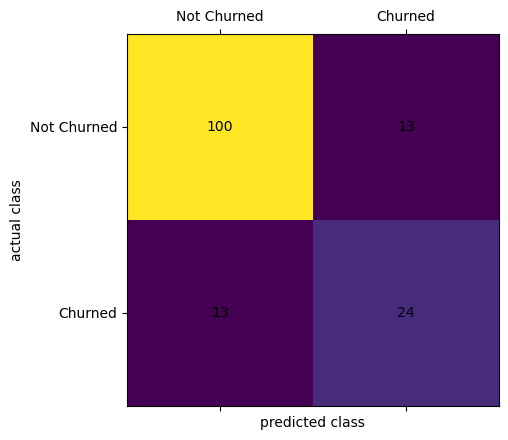

In [58]:
plt.matshow(confusion_matrix(Y_test,predLR))

plt.xlabel('predicted class')
plt.ylabel('actual class')

for i in range(2):
    for j in range(2):
        plt.text(j ,i ,confusion_matrix_LR[i,j] ,ha='center' , va= 'center')


plt.xticks([0, 1] , ['Not Churned' ,'Churned'])
plt.yticks([0, 1] , ['Not Churned' ,'Churned'])
plt.show()

In [61]:
logmodel.score(x_train,Y_train)

0.7879656160458453

In [62]:
accuracy_score(Y_test,predLR)

0.8266666666666667

In [63]:
# PREDICTION USING SUPPORT VECTOR CLASSIFIER

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, Y_train)
y_pred_svc = svc.predict(x_test)


In [65]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.87      0.92      0.90       113
        True       0.71      0.59      0.65        37

    accuracy                           0.84       150
   macro avg       0.79      0.76      0.77       150
weighted avg       0.83      0.84      0.84       150



In [66]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

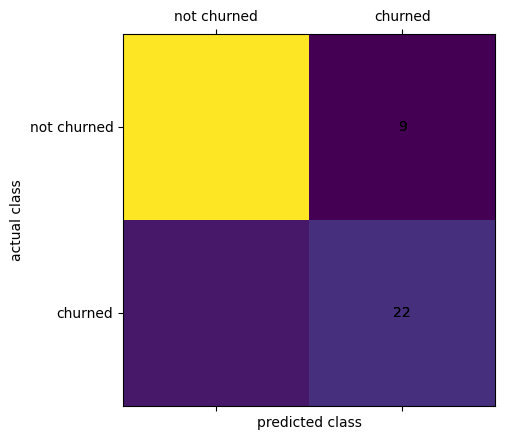

In [68]:
plt.matshow(confusion_matrix_svc)

plt.xlabel('predicted class')
plt.ylabel('actual class')

for i in range(2):
    for i in range(2):
        plt.text(j,i, confusion_matrix_svc[i,j], ha='center', va='center')

plt.xticks([0,1],['not churned','churned'])
plt.yticks([0,1],['not churned','churned'])
plt.show()

In [70]:
svc.score(x_train,Y_train)

0.8481375358166189

In [71]:
accuracy_score(Y_test, y_pred_svc)

0.84

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,Y_train)
y_pred_dtc = dtc.predict(x_test)

In [76]:
print(classification_report(Y_test,y_pred_dtc))


              precision    recall  f1-score   support

       False       0.85      0.78      0.81       113
        True       0.47      0.59      0.52        37

    accuracy                           0.73       150
   macro avg       0.66      0.69      0.67       150
weighted avg       0.76      0.73      0.74       150



In [77]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

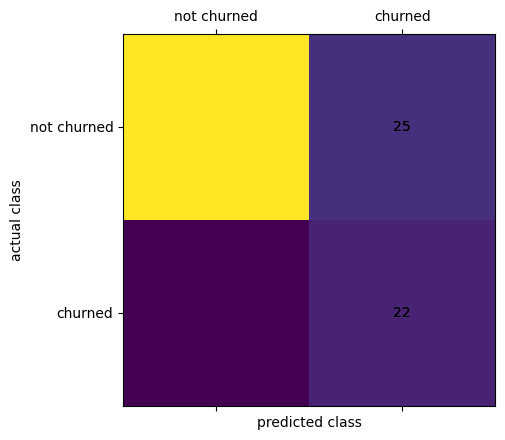

In [80]:
plt.matshow(confusion_matrix_dtc)

plt.xlabel('predicted class')
plt.ylabel('actual class')

for i in range(2):
    for i in range(2):
        plt.text(j,i,confusion_matrix_dtc[i,j], ha ='center' ,va= 'center')


plt.xticks([0,1],['not churned', 'churned'])
plt.yticks([0,1],['not churned', 'churned'])
plt.show()

In [81]:
dtc.score(x_train,Y_train)

1.0

In [82]:
accuracy_score(Y_test,y_pred_dtc)

0.7333333333333333

In [91]:
# PREDICTING USING KNN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train ,Y_train)


KNeighborsClassifier(n_neighbors=30)

In [92]:
pred_knn = knn.predict(x_test)

In [93]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(x_train,Y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=Y_test))

Text(0, 0.5, 'Error Rate')

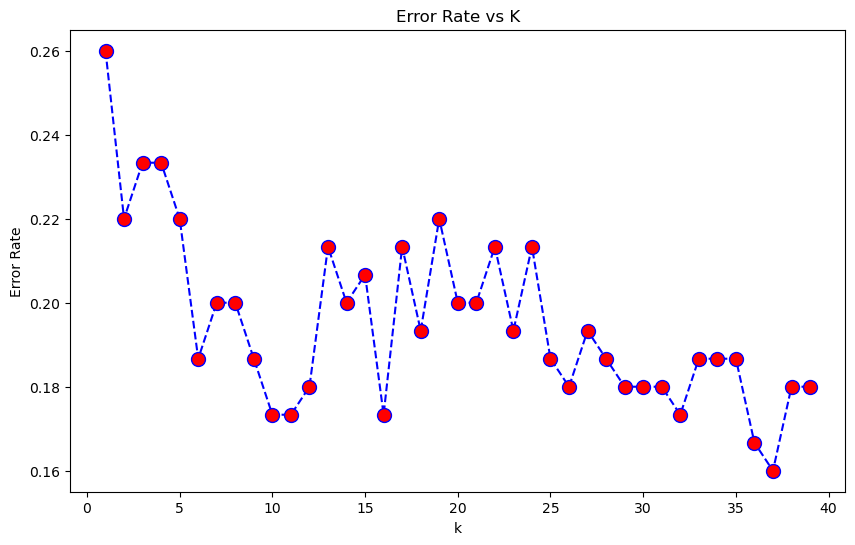

In [94]:
plt.figure(figsize = (10,6))
plt.plot (range(1,40),error_rate,color = 'blue' ,linestyle = '--',marker ='o' ,markerfacecolor = 'red' ,markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('k')
plt.ylabel('Error Rate')


In [96]:
print(classification_report(Y_test ,pred_knn))

              precision    recall  f1-score   support

       False       0.85      0.92      0.89       113
        True       0.68      0.51      0.58        37

    accuracy                           0.82       150
   macro avg       0.77      0.72      0.73       150
weighted avg       0.81      0.82      0.81       150



In [97]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

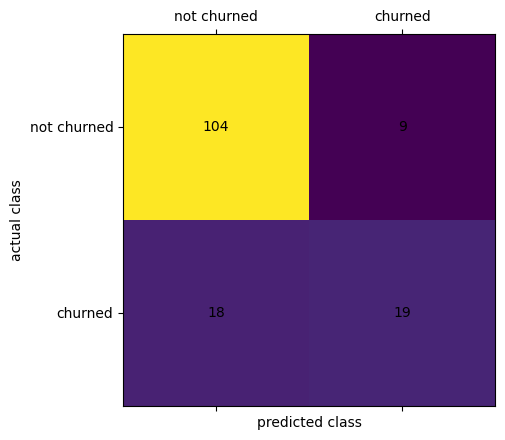

In [98]:
plt.matshow(confusion_matrix_knn)

plt.xlabel('predicted class')
plt.ylabel('actual class')

for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_knn[i,j], ha = 'center', va = 'center')

plt.xticks([0,1],['not churned','churned'])
plt.yticks([0,1],['not churned', 'churned'])
plt.show()

In [99]:
knn.score(x_train,Y_train)


0.7765042979942693

In [ ]:
accu